In [0]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())



Using TensorFlow backend.






553467904/553467096 [==============================] - 7s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________

In [0]:
for layer in model.layers:
    if 'conv'  in layer.name.lower():
      filters, biases = layer.get_weights()
      print(layer.name,filters.shape)
    else:
      weights = layer.get_weights()
      if len(weights)>0:
        message = ",".join([str(w.shape) for w in weights])
      else:
        message="none"
      print(f"{layer.name} weights: {message}")


input_1 weights: none
block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block1_pool weights: none
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block2_pool weights: none
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block3_pool weights: none
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block4_pool weights: none
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)
block5_pool weights: none
flatten weights: none
fc1 weights: (25088, 4096),(4096,)
fc2 weights: (4096, 4096),(4096,)
predictions weights: (4096, 1000),(1000,)


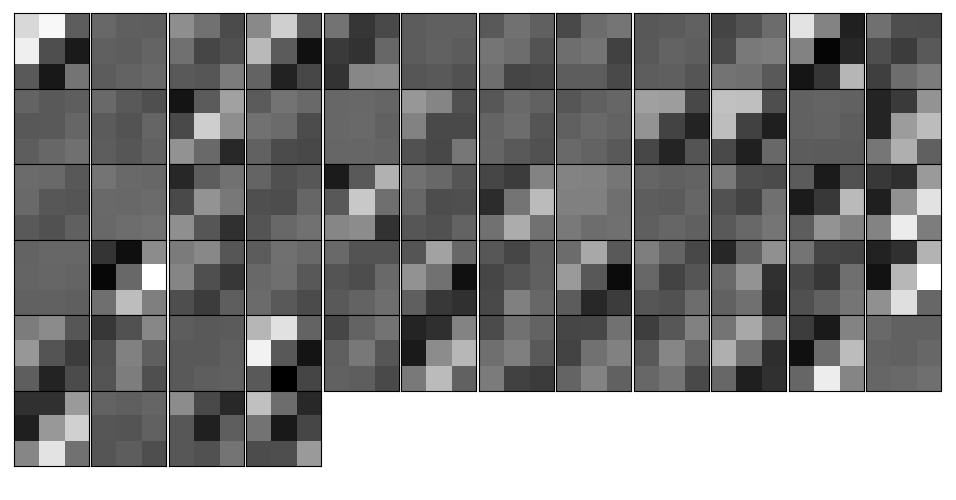

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

def plot_conv_weight(layer_name,filters,max_filters=128,cols=12):
  h,w,c=filters.shape
  if c>max_filters:
    filters=filters[:,:,max_filters]
    c = max_filters
  # calcular cant de filas
  rows=( c // cols ) + int((c % cols)>0)
  # grilla de imágenes
  f=plt.figure(figsize=(cols,rows),dpi=100)
  gs = gridspec.GridSpec(rows, cols,wspace=0.0001,hspace=0.001)
  # maximo y minimo para dibujar todos en la misma escala
  mi,ma=filters.min(),filters.max()
  for i in range(c):
      ax = plt.subplot(gs[i])
      ax.imshow(filters[:,:,i],cmap="gray",vmin=mi,vmax=ma)
      ax.set_xticks([])
      ax.set_yticks([])
  # poner en blanco los ax que sobran
  for i in range(c,cols*rows):
    ax = plt.subplot(gs[i])
    ax.axis("off")

      

def layer_by_name(model,layer_name):
  for layer in model.layers:
    if layer.name==layer_name:        
      return layer
  raise ValueError(f"Invalid layer name {layer_name}")

#Elegir capa convolucional y nro de filtro
layer_name="block1_conv2"
filter_index=0
#dibujar filtro
layer = layer_by_name(model,layer_name)
filters, biases = layer.get_weights()
plot_conv_weight(layer.name,filters[:,:,:,filter_index])

